# Clasificacion Automatica de Tickets con NLP

### Integrantes
* Ivan Castillo
* Adad Flores
* Nadir Rodriguez
* Carlos Perez

## Descripcion del Problema

Debe crear un modelo que pueda clasificar las quejas (complaints) de los clientes en función de los productos/servicios. Al hacerlo, puede segregar estos tickets en sus categorías relevantes y, por lo tanto, ayudar en la resolución rápida del problema.

Realizará el modelado de temas en los datos <b>.json</b> proporcionados por la empresa. Dado que estos datos no están etiquetados, debe aplicar NMF para analizar patrones y clasificar los tickets en los siguientes cinco grupos según sus productos/servicios:

* Tarjetas de Credito / Tarjetas Prepagadas (Credit card / Prepaid Card)

* Servicios de Cuentas de Banco (Bank account services)

* Reportes de Robos (Theft/Dispute reporting)

* Prestamos Hipotecarios y Otros Prestamos (Mortgages/loans)

* Otros

Con la ayuda del modelado de temas, podrá asignar cada ticket a su respectivo departamento/categoría. Luego puede usar estos datos para entrenar cualquier modelo supervisado, como regresión logística, árbol de decisión o bosque aleatorio. Usando este modelo entrenado, puede clasificar cualquier nuevo ticket de soporte de quejas de clientes en su departamento correspondiente.

## Flujo de Trajajo a Realizar:

Debe realizar las siguientes ocho tareas principales para completar la tarea:

1. Data Loading

2. Text preprocessing

3. Exploratory Data Analysis (EDA)

4. Feature Extraction

5. Topic modeling

6. Model building using Supervised Learning

7. Model training and evaluation

8. Model inference

## Setup e Importacion de Librerias

In [1]:
## SpaCy and en_core_web_sm installation
!pip install spacy

##run the following command in the console
#python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.0.2-cp311-cp311-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.0.2-cp311-cp311-win_amd64.whl (15.9 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.0.2 which is incompatible.
numba 0.57.1 requires numpy<1.25,>=1.21, but you have numpy 2.0.2 which is incompatible.
scipy 1.11.1 requires numpy<1.28.0,>=1.21.6, but you have numpy 2.0.2 which is incompatible.


In [2]:
 import sys
 print(sys.executable)

c:\Users\adadf\AppData\Local\Programs\Python\Python311\python.exe


In [3]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 8.4 MB/s eta 0:00:02
     ---- ----------------------------------- 1.6/12.8 MB 8.4 MB/s eta 0:00:02
     --------- ------------------------------ 3.1/12.8 MB 5.4 MB/s eta 0:00:02
     ------------- -------------------------- 4.2/12.8 MB 5.5 MB/s eta 0:00:02
     ------------------ --------------------- 6.0/12.8 MB 6.1 MB/s eta 0:00:02
     ---------------------- ----------------- 7.1/12.8 MB 5.8 MB/s eta 0:00:01
     ------------------------- -------------- 8.1/12.8 MB 5.8 MB/s eta 0:00:01
     ----------------------------- ---------- 9.4/12.8 MB 5.7 MB/s eta 0:00:01
     -------------------------------- ------- 10.5/12.8 MB 5.7 MB/s eta 0:00:01
     ------------------------------------ --- 11.5/12.8 MB 5.6 MB/s eta 0:00:01
     ---------------------------------------  12.6/12.8 MB 5.6 MB/s eta 0:00:01
     ---------------------------------------- 12.8/12.8 

## Importing the necessary libraries

In [6]:
# Importación de bibliotecas necesarias para el procesamiento de datos y NLP

# Importa la biblioteca json para trabajar con datos en formato JSON
import json

# Importa numpy para operaciones numéricas y pandas para manipulación de datos
import numpy as np
import pandas as pd

# Importa re para expresiones regulares y string para operaciones con cadenas de texto
import re, string

# Importa bibliotecas de NLTK para procesamiento de lenguaje natural
import nltk
from nltk.tokenize import word_tokenize  # Tokenización de palabras
from nltk.probability import FreqDist  # Distribución de frecuencias de palabras
from nltk.corpus import stopwords  # Lista de palabras vacías (stopwords)
from nltk.stem import WordNetLemmatizer  # Lematización de palabras

# Importa bibliotecas de Spacy para procesamiento de lenguaje natural
import spacy
import en_core_web_sm  # Modelo de Spacy para inglés
nlp = en_core_web_sm.load()  # Carga el modelo de Spacy

# Importa bibliotecas para visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Importa bibliotecas de Plotly para visualización interactiva
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

# Importa bibliotecas de Scikit-learn para extracción de características de texto
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from pprint import pprint  # Para impresión con formato

# Suprime las advertencias
import warnings
warnings.filterwarnings('ignore')  # Ignora las advertencias

In [7]:
# Descarga de recursos de NLTK necesarios para el procesamiento de lenguaje natural

# Descarga la lista de palabras vacías (stopwords) en varios idiomas
nltk.download('stopwords')

# Descarga el modelo de tokenización de palabras en inglés
nltk.download('punkt')

# Descarga la tabla de tokenización de palabras en inglés
nltk.download('punkt_tab')

# Descarga el diccionario de lematización WordNet
nltk.download('wordnet')

# Descarga el paquete de datos multilingües de WordNet
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adadf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adadf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\adadf\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adadf\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\adadf\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Instalación de la biblioteca tqdm para mostrar barras de progreso en bucles

In [8]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


## Loading the data

Los datos están en formato JSON y necesitamos convertirlos a un dataframe.

In [11]:
# Apertura del archivo JSON
file_name = "complaints.json"  # Nombre y ruta del archivo JSON que contiene los datos
f = file = open(file_name, "r")  # Abre el archivo en modo lectura ("r") y asigna el objeto de archivo a la variable 'f'

# Carga el contenido del archivo JSON y lo convierte en un diccionario de Python
data = json.load(f)  # La función json.load() toma el objeto de archivo 'f' como parámetro y devuelve un diccionario con los datos JSON

# Normaliza los datos JSON en un DataFrame de pandas
df = pd.json_normalize(data)  # La función pd.json_normalize() toma el diccionario 'data' como parámetro y lo convierte en un DataFrame de pandas

In [12]:
df.shape

(11426, 22)

## Data preparation

Inspección del DataFrame para entender los datos proporcionados

In [13]:
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [14]:
df.tail()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
11421,complaint-public-v2,complaint,3691002,0.0,None,601XX,3691002,Trouble during payment process,2020-06-08T12:00:00-05:00,IL,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2020-06-09T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,N/A
11422,complaint-public-v2,complaint,3998033,0.0,None,19115,3998033,Incorrect information on your report,2020-12-08T12:00:00-05:00,PA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2020-12-08T12:00:00-05:00,None,Credit reporting,Yes,,Information belongs to someone else,Consent not provided
11423,complaint-public-v2,complaint,4005328,0.0,None,701XX,4005328,Closing an account,2020-12-11T12:00:00-05:00,LA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2020-12-11T12:00:00-05:00,None,Checking account,Yes,,Funds not received from closed account,Consent not provided
11424,complaint-public-v2,complaint,3997453,0.0,None,33180,3997453,Opening an account,2020-12-08T12:00:00-05:00,FL,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2020-12-08T12:00:00-05:00,None,Checking account,Yes,,Account opened as a result of fraud,N/A
11425,complaint-public-v2,complaint,3759084,0.0,None,101XX,3759084,Closing an account,2020-07-23T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2020-07-23T12:00:00-05:00,None,Checking account,Yes,XX/XX/XXXX Dear CFPB : I hope this finds you w...,NaN,NaN


In [15]:
df.shape

(11426, 22)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11426 entries, 0 to 11425
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             11426 non-null  object 
 1   _type                              11426 non-null  object 
 2   _id                                11426 non-null  object 
 3   _score                             11426 non-null  float64
 4   _source.tags                       1668 non-null   object 
 5   _source.zip_code                   10059 non-null  object 
 6   _source.complaint_id               11426 non-null  object 
 7   _source.issue                      11426 non-null  object 
 8   _source.date_received              11426 non-null  object 
 9   _source.state                      10965 non-null  object 
 10  _source.consumer_disputed          11426 non-null  object 
 11  _source.product                    11426 non-null  obj

Verificación de valores faltantes en el DataFrame en orden descendente

In [17]:
# La función df.isna().sum() calcula el número de valores faltantes (NaN) en cada columna del DataFrame.
# df.shape[0] devuelve el número total de filas en el DataFrame.
# Al dividir el número de valores faltantes por el número total de filas, se obtiene la proporción de valores faltantes en cada columna.
# sort_values(ascending=False) ordena estas proporciones en orden descendente, mostrando primero las columnas con mayor proporción de valores faltantes.

(df.isna().sum() / df.shape[0]).sort_values(ascending=False)

_source.company_public_response      0.999912
_source.tags                         0.854017
_source.sub_issue                    0.346928
_source.zip_code                     0.119639
_source.sub_product                  0.047873
_source.state                        0.040347
_source.consumer_consent_provided    0.013741
_score                               0.000000
_index                               0.000000
_type                                0.000000
_id                                  0.000000
_source.complaint_id                 0.000000
_source.issue                        0.000000
_source.date_received                0.000000
_source.company                      0.000000
_source.company_response             0.000000
_source.product                      0.000000
_source.consumer_disputed            0.000000
_source.submitted_via                0.000000
_source.date_sent_to_company         0.000000
_source.complaint_what_happened      0.000000
_source.timely                    

Imprime los nombres de las columnas del DataFrame

In [18]:
print(df.columns)

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')


Definimos la funcion rename_col

In [19]:
# Asigna nuevos nombres a las columnas
def rename_col(col):
    """
    Renombra una columna eliminando prefijos específicos.

    Parámetros:
    col (str): El nombre original de la columna.

    Retorna:
    str: El nuevo nombre de la columna sin los prefijos '_source.' o '_'.
    """
    # Si el nombre de la columna comienza con '_source', elimina este prefijo
    if col.startswith('_source'):
        col = col[len('_source.'):]
    # Si el nombre de la columna comienza con '_', elimina este prefijo
    elif col.startswith('_'):
        col = col[1:]
    return col

Renombra las columnas del DataFrame utilizando la función rename_col

In [20]:
# La función df.rename() se utiliza para renombrar las etiquetas (nombres de columnas o índices) del DataFrame.
# Parámetros:
# - lambda x: rename_col(x): Una función lambda que aplica la función rename_col a cada nombre de columna.
# - axis=1: Indica que la operación se aplica a las columnas (axis=0 se aplicaría a los índices de las filas).
# - inplace=True: Modifica el DataFrame original en lugar de devolver una copia con los cambios.

df.rename(lambda x: rename_col(x), axis=1, inplace=True)

In [21]:
df.columns

Index(['index', 'type', 'id', 'score', 'tags', 'zip_code', 'complaint_id',
       'issue', 'date_received', 'state', 'consumer_disputed', 'product',
       'company_response', 'company', 'submitted_via', 'date_sent_to_company',
       'company_public_response', 'sub_product', 'timely',
       'complaint_what_happened', 'sub_issue', 'consumer_consent_provided'],
      dtype='object')

Asigna NaN en lugar de cadenas vacías en la columna 'complaint_what_happened'

In [22]:
# La función df['complaint_what_happened'].replace() se utiliza para reemplazar valores específicos en una columna del DataFrame.
# Parámetros:
# - '': El valor que se desea reemplazar, en este caso, cadenas vacías.
# - np.nan: El nuevo valor que reemplazará las cadenas vacías, en este caso, NaN (Not a Number), que representa valores faltantes.
# - inplace=True: Modifica el DataFrame original en lugar de devolver una copia con los cambios.

df['complaint_what_happened'].replace('', np.nan, inplace=True)

In [23]:
df['complaint_what_happened'][1]

'Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.'

In [24]:
# Cuenta el número de valores NaN en la columna 'complaint_what_happened' después de eliminar las filas con NaN
# La función df['complaint_what_happened'].isnull().sum() cuenta el número de valores NaN en la columna especificada.
# No requiere parámetros adicionales.
# Devuelve un entero que representa el número de valores NaN en la columna 'complaint_what_happened'.

df['complaint_what_happened'].isnull().sum()

np.int64(7395)

Elimina todas las filas donde la columna 'complaint_what_happened' es NaN

In [25]:
# La función df.dropna() se utiliza para eliminar filas o columnas con valores faltantes (NaN) en el DataFrame.
# Parámetros:
# - subset=['complaint_what_happened']: Especifica que solo se deben considerar los valores faltantes en la columna 'complaint_what_happened'.
# - inplace=True: Modifica el DataFrame original en lugar de devolver una copia con los cambios.

df.dropna(subset=['complaint_what_happened'], inplace=True)

In [26]:
df.shape

(4031, 22)

El DataFrame df tiene:
*21,072 filas: Cada fila representa una queja individual en tu conjunto de datos.
*22 columnas: Cada columna representa una característica o atributo diferente de las quejas, como puede ser el texto de la queja, la fecha, el tipo de producto, etc.

## Prepare the text for topic modeling

Una vez que haya eliminado todas las quejas en blanco, debe:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers

Una vez que haya realizado estas operaciones de limpieza, debe realizar lo siguiente:

* Lemmatize the texts
* Extract the POS tags of the lemmatized text and remove all the words which have tags other than NN[tag == "NN"].


Definimos la función clean_text para limpiar el texto y eliminar todos los elementos innecesarios

In [27]:
def clean_text(text):
    """
    Limpia el texto eliminando elementos innecesarios como puntuación, saltos de línea, 
    palabras con números y espacios en blanco adicionales.

    Parámetros:
    text (str): El texto original que se desea limpiar.

    Retorna:
    str: El texto limpio.
    """
    # Convierte el texto a minúsculas
    text = text.lower()
    
    # Elimina el texto dentro de corchetes
    text = re.sub(r'\[.*?\]', ' ', text)
    
    # Elimina la puntuación
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Elimina los saltos de línea
    text = re.sub(r'\n', '', text)
    
    # Elimina las palabras que contienen números
    text = re.sub(r'\b\w*\d\w*\b', ' ', text)
    
    # Elimina los espacios en blanco innecesarios
    text = re.sub(r' +', ' ', text)
    
    return text

Limpia el texto en la columna 'complaint_what_happened' del DataFrame

In [28]:
# Obtiene el número total de filas en el DataFrame
rows = df.shape[0]

# Reinicia los índices del DataFrame y descarta el índice anterior
# Parámetros:
# - drop=True: Elimina el índice anterior en lugar de añadirlo como una columna.
df = df.reset_index(drop=True)

# Itera sobre cada fila del DataFrame
for i in range(rows):
    # Limpia el texto en la columna 'complaint_what_happened' utilizando la función clean_text
    # Parámetros:
    # - df['complaint_what_happened'][i]: El texto original en la fila 'i' de la columna 'complaint_what_happened'.
    # La función clean_text devuelve el texto limpio, que se asigna de nuevo a la misma celda del DataFrame.
    df['complaint_what_happened'][i] = clean_text(df['complaint_what_happened'][i])


In [29]:
df['complaint_what_happened']

0       good morning my name is xxxx xxxx and i apprec...
1       i upgraded my xxxx xxxx card in xx xx and was ...
2       chase card was reported on xx xx however fraud...
3       on xx xx while trying to book a xxxx xxxx tick...
4       my grand son give me check for i deposit it in...
                              ...                        
4026    jpmcb auto finance has been on my credit repor...
4027    on xx xx xxxx a vendor double charged my chase...
4028    i filed an application for a mortgage refinanc...
4029    re claim xxxx i do not feel that chase bank pr...
4030    xx xx xxxx dear cfpb i hope this finds you wel...
Name: complaint_what_happened, Length: 4031, dtype: object

In [30]:
df.shape

(4031, 22)

In [31]:
# Importa la biblioteca spaCy para procesamiento de lenguaje natural
import spacy

# Obtiene la lista de palabras vacías (stop words) en inglés de spaCy
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Carga el modelo de lenguaje en inglés de spaCy
# El modelo "en_core_web_sm" es un modelo pequeño que incluye tokenización, etiquetado de partes del discurso, 
# lematización, reconocimiento de entidades nombradas y más.
nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    """
    Lematiza el texto eliminando las palabras vacías.

    Parámetros:
    text (str): El texto original que se desea lematizar.

    Retorna:
    str: El texto lematizado sin palabras vacías.
    """
    # Procesa el texto utilizando el modelo de spaCy
    doc = nlp(text)
    
    # Lematiza cada token y elimina las palabras vacías
    # La lista de comprensión recorre cada token en el documento procesado 'doc'
    # token.lemma_ obtiene la forma lematizada del token
    # token.is_stop verifica si el token es una palabra vacía
    lemmatized_text = " ".join([token.lemma_ for token in doc if not token.is_stop])
    
    return lemmatized_text

In [32]:
lemmatize_text(clean_text(df['complaint_what_happened'][101]))

'complaint chase bank deny open check account refuse explanation chase credit card issue credit card chase bank timeline note check account denial xx xx xxxx meet xxxx xxxx private client banker xxxx xxxx xxxx location open check account check xxxx xxxx xxxx personal checking account chase check recently close chase credit card give pre print check deposit slip chase total checking account xxxx xxxx mention account close review tell reason idea assume boiler plate language assume not close electronically sign document receive copy xx xx xxxx xxxx account alert screen shot new application inquiry xx xx xxxx email chase debit atm xx xx xxxx email chase mobile app request sign mobile app electronic copy disclosure sign open account note long account long access document xx xx xxxx ask xxxx copy document receive printout deposit account agreement privacy notice xx xx xxxx xxxx account alert new account opening xx xx xxxx email chase account tool xx xx xxxx receive activate atm card xxxx ex

Aplica la limpieza de datos a la columna 'complaint_what_happened'

In [33]:
# Importa la biblioteca tqdm para mostrar barras de progreso en bucles
from tqdm import tqdm

# Inicializa tqdm para usarlo con pandas
# La función tqdm.pandas() permite usar tqdm con las funciones de pandas, como apply, para mostrar una barra de progreso.
tqdm.pandas()

# Crea un nuevo DataFrame para almacenar los datos limpios
df_clean = pd.DataFrame()

# Aplica la función de limpieza de texto a cada elemento de la columna 'complaint_what_happened'
# Parámetros:
# - df['complaint_what_happened']: La Serie de pandas que contiene los textos originales.
# - progress_apply(lambda x: clean_text(x)): Aplica la función clean_text a cada elemento de la Serie, mostrando una barra de progreso.
# La función lambda toma cada texto 'x' y aplica la función clean_text a él.
# El resultado se almacena en la nueva columna 'complaints' del DataFrame df_clean.
df_clean['complaints'] = df['complaint_what_happened'].progress_apply(lambda x: clean_text(x))

100%|██████████| 4031/4031 [00:00<00:00, 6043.05it/s]


In [34]:
df_clean.shape

(4031, 1)

In [35]:
# Inicializa tqdm para usarlo con pandas
# La función tqdm.pandas() permite usar tqdm con las funciones de pandas, como apply, para mostrar una barra de progreso.
tqdm.pandas()

# Aplica la lematización a la columna 'complaints' y guarda el resultado en una nueva columna 'lemmatized'
# Parámetros:
# - df_clean['complaints']: La Serie de pandas que contiene los textos limpios.
# - progress_apply(lambda x: lemmatize_text(x)): Aplica la función lemmatize_text a cada elemento de la Serie, mostrando una barra de progreso.
# La función lambda toma cada texto 'x' y aplica la función lemmatize_text a él.
# El resultado se almacena en la nueva columna 'lemmatized' del DataFrame df_clean.
df_clean['lemmatized'] = df_clean['complaints'].progress_apply(lambda x: lemmatize_text(x))

100%|██████████| 4031/4031 [02:12<00:00, 30.48it/s]


In [36]:
df_clean.shape

(4031, 2)

In [37]:
df_clean.head(50)

,complaints,lemmatized
0,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...
1,i upgraded my xxxx xxxx card in xx xx and was ...,upgrade xxxx xxxx card xx xx tell agent upgrad...
2,chase card was reported on xx xx however fraud...,chase card report xx xx fraudulent application...
3,on xx xx while trying to book a xxxx xxxx tick...,xx xx try book xxxx xxxx ticket come offer app...
4,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...
5,can you please remove inquiry,remove inquiry
6,with out notice j p morgan chase restricted my...,notice j p morgan chase restrict account debit...
7,during the summer months i experience a declin...,summer month experience decline income employm...
8,on xxxx xx xx i made a payment to an online re...,xxxx xx xx payment online retailer chase quick...
9,i have a chase credit card which is incorrectl...,chase credit card incorrectly report datum cre...


In [38]:
df_clean.shape

(4031, 2)

Define la función extract_pos_tags para extraer las etiquetas de partes del discurso (POS) específicas

In [39]:
def extract_pos_tags(text):
    """
    Extrae las palabras que tienen una etiqueta de parte del discurso (POS) específica.

    Parámetros:
    text (str): El texto del cual se desean extraer las etiquetas POS.

    Retorna:
    str: Un texto que contiene solo las palabras con la etiqueta POS especificada.
    """
    # Procesa el texto utilizando el modelo de spaCy
    doc = nlp(text)
    
    # Extrae las palabras que tienen la etiqueta POS 'NN' (sustantivos)
    # La lista de comprensión recorre cada token en el documento procesado 'doc'
    # token.text obtiene el texto del token
    # token.tag_ verifica si la etiqueta POS del token es 'NN' (sustantivo)
    pos_tags = [token.text for token in doc if token.tag_ == 'NN']
    
    # Une las palabras extraídas en una sola cadena de texto, separadas por espacios
    return ' '.join(pos_tags)

# Aplica la función extract_pos_tags a la columna 'lemmatized' y guarda el resultado en una nueva columna 'complaint_POS_removed'
# Parámetros:
# - df_clean['lemmatized']: La Serie de pandas que contiene los textos lematizados.
# - apply(lambda x: extract_pos_tags(x)): Aplica la función extract_pos_tags a cada elemento de la Serie.
# La función lambda toma cada texto 'x' y aplica la función extract_pos_tags a él.
# El resultado se almacena en la nueva columna 'complaint_POS_removed' del DataFrame df_clean.
df_clean['complaint_POS_removed'] = df_clean.lemmatized.apply(lambda x: extract_pos_tags(x))

# Muestra las primeras filas del DataFrame df_clean para verificar los resultados
df_clean.head()


,complaints,lemmatized,complaint_POS_removed
0,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,morning help chase debt verification statement...
1,i upgraded my xxxx xxxx card in xx xx and was ...,upgrade xxxx xxxx card xx xx tell agent upgrad...,agent anniversary date change agent informatio...
2,chase card was reported on xx xx however fraud...,chase card report xx xx fraudulent application...,card application identity consent service exte...
3,on xx xx while trying to book a xxxx xxxx tick...,xx xx try book xxxx xxxx ticket come offer app...,offer ticket reward card information minute no...
4,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,son deposit chase account fund account pay mon...


In [40]:
extract_pos_tags(df_clean['lemmatized'][0])

'morning help chase debt verification statement validate debt mail month attempt debt information consumer chase account advance help'

In [41]:
def remove_x_variations(text):
    """
    Elimina variaciones de la letra 'x' que aparecen entre 2 y 4 veces consecutivas en el texto.

    Parámetros:
    text (str): El texto original del cual se desean eliminar las variaciones de 'x'.

    Retorna:
    str: El texto con las variaciones de 'x' eliminadas.
    """
    # Utiliza la función re.sub() para buscar y reemplazar patrones en el texto.
    # Parámetros:
    # - r'\b(x{2,4})\b': Expresión regular que busca palabras que consisten en la letra 'x' repetida entre 2 y 4 veces.
    #   \b: Coincide con los límites de palabra.
    #   x{2,4}: Coincide con la letra 'x' repetida entre 2 y 4 veces.
    # - '': Reemplaza las coincidencias encontradas con una cadena vacía, eliminándolas del texto.
    # - text: El texto original en el que se realizará la búsqueda y reemplazo.
    # - flags=re.IGNORECASE: Ignora mayúsculas y minúsculas durante la búsqueda.
    # La función strip() elimina los espacios en blanco al principio y al final del texto resultante.
    return re.sub(r'\b(x{2,4})\b', '', text, flags=re.IGNORECASE).strip()

## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

Elimina valores NaN y variaciones de 'x' en la columna 'complaint_POS_removed'

In [42]:
# Rellena los valores NaN en la columna 'complaint_POS_removed' con cadenas vacías y convierte los datos a tipo string
# Parámetros:
# - fillna(''): Rellena los valores NaN con cadenas vacías.
# - astype(str): Convierte los datos de la columna a tipo string.
df_clean['complaint_POS_removed'] = df_clean['complaint_POS_removed'].fillna('').astype(str)

# Aplica la función remove_x_variations a la columna 'complaint_POS_removed' y guarda el resultado en una nueva columna 'complaint_POS_cleaned'
# Parámetros:
# - df_clean['complaint_POS_removed']: La Serie de pandas que contiene los textos con etiquetas POS eliminadas.
# - apply(remove_x_variations): Aplica la función remove_x_variations a cada elemento de la Serie.
# La función remove_x_variations elimina variaciones de la letra 'x' que aparecen entre 2 y 4 veces consecutivas en el texto.
# El resultado se almacena en la nueva columna 'complaint_POS_cleaned' del DataFrame df_clean.
df_clean['complaint_POS_cleaned'] = df_clean['complaint_POS_removed'].apply(remove_x_variations)

In [43]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags and without variations of XXXX
df_clean

,complaints,lemmatized,complaint_POS_removed,complaint_POS_cleaned
0,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,morning help chase debt verification statement...,morning help chase debt verification statement...
1,i upgraded my xxxx xxxx card in xx xx and was ...,upgrade xxxx xxxx card xx xx tell agent upgrad...,agent anniversary date change agent informatio...,agent anniversary date change agent informatio...
2,chase card was reported on xx xx however fraud...,chase card report xx xx fraudulent application...,card application identity consent service exte...,card application identity consent service exte...
3,on xx xx while trying to book a xxxx xxxx tick...,xx xx try book xxxx xxxx ticket come offer app...,offer ticket reward card information minute no...,offer ticket reward card information minute no...
4,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,son deposit chase account fund account pay mon...,son deposit chase account fund account pay mon...
...,...,...,...,...
4026,jpmcb auto finance has been on my credit repor...,jpmcb auto finance credit report thatn month c...,auto finance credit report month charge hardsh...,auto finance credit report month charge hardsh...
4027,on xx xx xxxx a vendor double charged my chase...,xx xx xxxx vendor double charge chase card tel...,charge chase card chase problem phone problem ...,charge chase card chase problem phone problem ...
4028,i filed an application for a mortgage refinanc...,file application mortgage refinance loan chase...,file application mortgage refinance loan chase...,file application mortgage refinance loan chase...
4029,re claim xxxx i do not feel that chase bank pr...,claim xxxx feel chase bank properly take time ...,time address dispute merchant cancel transacti...,time address dispute merchant cancel transacti...


## Exploratory data analysis to get familiar with the data.

Escriba el código en esta tarea para realizar lo siguiente:

* Visualiza los datos según la longitud del carácteres 'Complaint'
* Usando una nube de palabras, encuentre las top 40 palabras más frecuentes de todos los artículos después de procesar el texto
* Encuentre los mejores unigramas, bigramas y trigramas por frecuencia entre todas las quejas después de procesar el texto. '

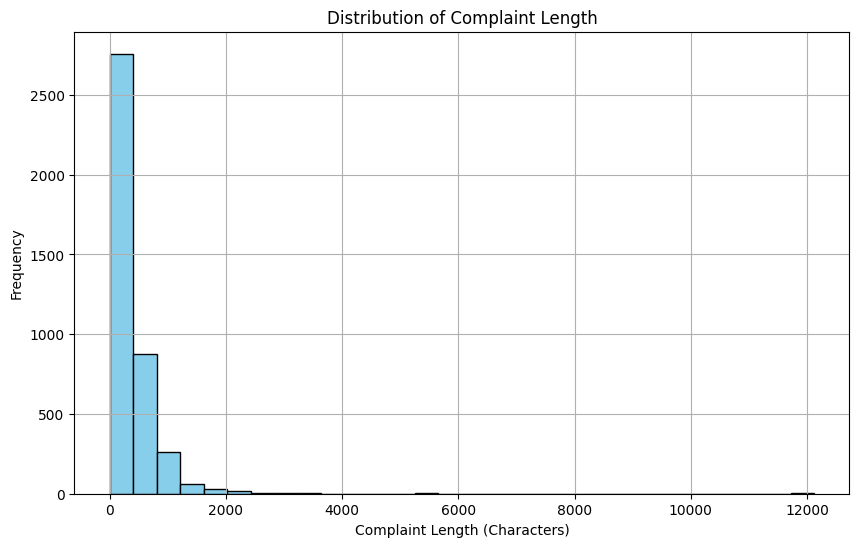

In [44]:
# Crea una figura y un conjunto de ejes
# Parámetros:
# - figsize=(10, 6): Establece el tamaño de la figura en 10 pulgadas de ancho y 6 pulgadas de alto.
plt.figure(figsize=(10, 6))

# Crea un histograma de la longitud de los textos en la columna 'complaint_POS_cleaned'
# Parámetros:
# - df_clean['complaint_POS_cleaned'].str.len(): Calcula la longitud de cada texto en la columna 'complaint_POS_cleaned'.
# - bins=30: Divide los datos en 30 intervalos (bins).
# - color='skyblue': Establece el color de las barras del histograma a azul cielo.
# - edgecolor='black': Establece el color del borde de las barras a negro.
plt.hist(df_clean['complaint_POS_cleaned'].str.len(), bins=30, color='skyblue', edgecolor='black')

# Establece la etiqueta del eje x
# Parámetros:
# - 'Complaint Length (Characters)': El texto de la etiqueta del eje x.
plt.xlabel('Complaint Length (Characters)')

# Establece la etiqueta del eje y
# Parámetros:
# - 'Frequency': El texto de la etiqueta del eje y.
plt.ylabel('Frequency')

# Establece el título del gráfico
# Parámetros:
# - 'Distribution of Complaint Length': El texto del título del gráfico.
plt.title('Distribution of Complaint Length')

# Activa la cuadrícula en el gráfico
# Parámetros:
# - True: Activa la cuadrícula.
plt.grid(True)

# Muestra el gráfico
plt.show()

#### Find the top 40 words by frequency among all the articles after processing the text.

Se instalara la biblioteca wordcloud para generar nubes de palabras

In [45]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adadf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


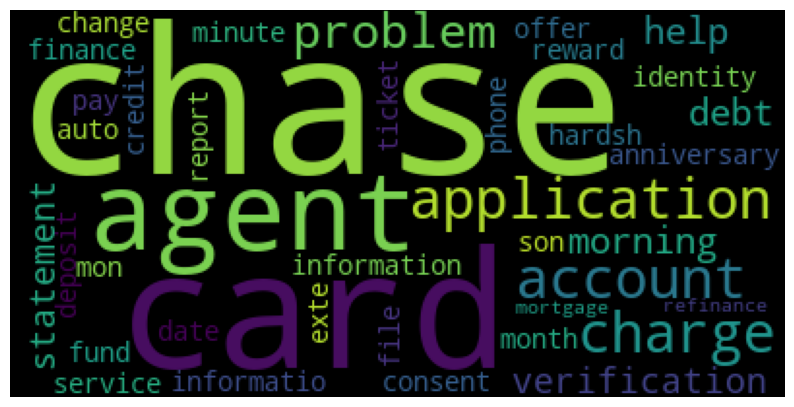

In [46]:
# Importa la clase WordCloud de la biblioteca wordcloud para generar nubes de palabras
from wordcloud import WordCloud

# Importa la biblioteca nltk para procesamiento de lenguaje natural
import nltk

# Importa la lista de palabras vacías (stopwords) de NLTK
from nltk.corpus import stopwords

# Descarga la lista de palabras vacías (stopwords) en inglés de NLTK
nltk.download('stopwords')

# Crea un conjunto de palabras vacías en inglés
# La función set(stopwords.words('english')) convierte la lista de palabras vacías en un conjunto para una búsqueda más rápida.
stopwords = set(stopwords.words('english'))

# Genera una nube de palabras a partir de la columna 'complaint_POS_cleaned' del DataFrame df_clean
# Parámetros:
# - stopwords=stopwords: El conjunto de palabras vacías que se deben excluir de la nube de palabras.
# - max_words=40: El número máximo de palabras que se mostrarán en la nube de palabras.
# La función str(df_clean.complaint_POS_cleaned) convierte la columna 'complaint_POS_cleaned' en una cadena de texto.
wordcloud = WordCloud(stopwords=stopwords, max_words=40).generate(str(df_clean.complaint_POS_cleaned))

# Imprime el objeto WordCloud generado
print(wordcloud)

# Crea una figura para mostrar la nube de palabras
# Parámetros:
# - figsize=(10, 6): Establece el tamaño de la figura en 10 pulgadas de ancho y 6 pulgadas de alto.
plt.figure(figsize=(10, 6))

# Muestra la nube de palabras en la figura
# La función plt.imshow() muestra una imagen en el gráfico.
# Parámetros:
# - wordcloud: El objeto WordCloud que contiene la nube de palabras generada.
plt.imshow(wordcloud)

# Elimina los ejes del gráfico
# La función plt.axis('off') oculta los ejes del gráfico.
plt.axis('off')

# Muestra el gráfico
plt.show()


Se elimina la cadena '-PRON-' del corpus de texto en la columna 'complaint_POS_cleaned'

In [47]:
# La función df_clean['complaint_POS_cleaned'].str.replace() se utiliza para reemplazar todas las ocurrencias de una subcadena en una Serie de pandas.
# Parámetros:
# - '-PRON-': La subcadena que se desea reemplazar.
# - '': La cadena vacía que reemplazará a '-PRON-', eliminándola del texto.
# El resultado se almacena en una nueva columna 'Complaint_clean' del DataFrame df_clean.
df_clean['Complaint_clean'] = df_clean['complaint_POS_cleaned'].str.replace('-PRON-', '')

# Elimina la columna 'complaint_POS_cleaned' del DataFrame df_clean

# La función df_clean.drop() se utiliza para eliminar filas o columnas del DataFrame.
# Parámetros:
# - ['complaint_POS_cleaned']: Una lista que contiene el nombre de la columna que se desea eliminar.
# - axis=1: Indica que se debe eliminar una columna (axis=0 se utilizaría para eliminar filas).
df_clean = df_clean.drop(['complaint_POS_cleaned'], axis=1)

In [48]:
df_clean ['Complaint_clean']

0       morning help chase debt verification statement...
1       agent anniversary date change agent informatio...
2       card application identity consent service exte...
3       offer ticket reward card information minute no...
4       son deposit chase account fund account pay mon...
                              ...                        
4026    auto finance credit report month charge hardsh...
4027    charge chase card chase problem phone problem ...
4028    file application mortgage refinance loan chase...
4029    time address dispute merchant cancel transacti...
4030    cfpb hope appeal assistance resolve issue than...
Name: Complaint_clean, Length: 4031, dtype: object

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

Se define la función get_top_n_bigram para obtener las frecuencias de los n-gramas más comunes en un texto

In [49]:
def get_top_n_bigram(text, ngram=1, top=None):
    """
    Encuentra los n-gramas más frecuentes en el texto.

    Parámetros:
    text (list of str): Una lista de cadenas de texto que se analizarán.
    ngram (int): El tamaño del n-grama (por defecto es 1 para unigrama).
    top (int): El número de n-gramas más frecuentes que se devolverán (por defecto es None, lo que devuelve todos).

    Retorna:
    list of tuples: Una lista de tuplas donde cada tupla contiene un n-grama y su frecuencia, ordenada por frecuencia descendente.
    """
    # Crea un objeto CountVectorizer para convertir una colección de texto en una matriz de tokens contados
    # Parámetros:
    # - ngram_range=(ngram, ngram): Define el rango de tamaño de los n-gramas a extraer (por ejemplo, (1, 1) para unigramas).
    # - stop_words='english': Elimina las palabras vacías en inglés.
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    
    # Transforma el texto en una matriz de conteo de n-gramas
    bag_of_words = vec.transform(text)
    
    # Suma los conteos de cada n-grama en la matriz
    sum_words = bag_of_words.sum(axis=0)
    
    # Crea una lista de tuplas donde cada tupla contiene un n-grama y su frecuencia
    # vec.vocabulary_.items() devuelve un diccionario de n-gramas y sus índices en la matriz
    # sum_words[0, idx] obtiene la frecuencia del n-grama en el índice dado
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    
    # Ordena la lista de tuplas por frecuencia en orden descendente
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Devuelve los 'top' n-gramas más frecuentes
    return words_freq[:top]

Se obtiene los 30 unigramas más frecuentes en la columna 'Complaint_clean' del DataFrame df_clean

In [50]:
# Obtiene los 30 unigramas más frecuentes en la columna 'Complaint_clean' del DataFrame df_clean

# Llama a la función get_top_n_bigram para encontrar los n-gramas más frecuentes en el texto.
# Parámetros:
# - df_clean.Complaint_clean: La Serie de pandas que contiene los textos limpios.
# - ngram=1: Especifica que se deben extraer unigramas (palabras individuales).
# - top=30: Especifica que se deben devolver los 30 unigramas más frecuentes.
# La función devuelve una lista de tuplas donde cada tupla contiene un unigrama y su frecuencia, ordenada por frecuencia descendente.
top_30_unigrams = get_top_n_bigram(df_clean.Complaint_clean, ngram=1, top=30)

Se imprime las 10 palabras más frecuentes en la lista de unigramas

In [51]:
print("Top 10 Unigrams:")

# Itera sobre los primeros 10 elementos de la lista top_30_unigrams
# Parámetros:
# - top_30_unigrams[:10]: Una lista de las 10 primeras tuplas (unigrama, frecuencia) de la lista top_30_unigrams.
for word, freq in top_30_unigrams[:10]:
    # Imprime cada unigrama y su frecuencia en el formato "palabra: frecuencia"
    # La función f"{word}: {freq}" utiliza una cadena formateada (f-string) para incluir el unigrama y su frecuencia en la cadena de texto.
    print(f"{word}: {freq}")

Top 10 Unigrams:
chase: 10509
account: 8141
credit: 6587
card: 6138
payment: 3633
charge: 3165
time: 2921
money: 2309
day: 2283
bank: 2231


Encuentra los 30 bigramas más frecuentes en la columna 'Complaint_clean' del DataFrame df_clean. Se llamara a la función get_top_n_bigram para encontrar los bigramas más frecuentes en el texto.

In [52]:
# Parámetros:
# - df_clean.Complaint_clean: La Serie de pandas que contiene los textos limpios.
# - ngram=2: Especifica que se deben extraer bigramas (pares de palabras consecutivas).
# - top=30: Especifica que se deben devolver los 30 bigramas más frecuentes.
# La función devuelve una lista de tuplas donde cada tupla contiene un bigrama y su frecuencia, ordenada por frecuencia descendente.
top_30_bigrams = get_top_n_bigram(df_clean.Complaint_clean, ngram=2, top=30)

Se imprime los 10 bigramas más frecuentes en la lista de bigramas

In [53]:
print("Top 10 Bigrams:")
# Itera sobre los primeros 10 elementos de la lista top_30_bigrams
# Parámetros:
# - top_30_bigrams[:10]: Una lista de las 10 primeras tuplas (bigrama, frecuencia) de la lista top_30_bigrams.
for word, freq in top_30_bigrams[:10]:
    # Imprime cada bigrama y su frecuencia en el formato "bigrama: frecuencia"
    # La función f"{word}: {freq}" utiliza una cadena formateada (f-string) para incluir el bigrama y su frecuencia en la cadena de texto.
    print(f"{word}: {freq}")

Top 10 Bigrams:
credit card: 2489
credit report: 784
chase credit: 598
account chase: 586
customer service: 561
chase account: 452
chase bank: 420
account account: 416
contact chase: 409
debit card: 403


Encontramos los 30 trigramas más frecuentes en la columna 'Complaint_clean' del DataFrame df_clean. Se llamara a la función get_top_n_bigram para encontrar los trigramas más frecuentes en el texto.

In [54]:
# Parámetros:
# - df_clean.Complaint_clean: La Serie de pandas que contiene los textos limpios.
# - ngram=3: Especifica que se deben extraer trigramas (grupos de tres palabras consecutivas).
# - top=30: Especifica que se deben devolver los 30 trigramas más frecuentes.
# La función devuelve una lista de tuplas donde cada tupla contiene un trigrama y su frecuencia, ordenada por frecuencia descendente.
top_30_trigrams = get_top_n_bigram(df_clean.Complaint_clean, ngram=3, top=30)

Se imprime los 10 trigramas más frecuentes en la lista de trigrams

In [55]:
print("Top 10 Trigrams:")

# Itera sobre los primeros 10 elementos de la lista top_30_trigrams
# Parámetros:
# - top_30_trigrams[:10]: Una lista de las 10 primeras tuplas (trigrama, frecuencia) de la lista top_30_trigrams.
for word, freq in top_30_trigrams[:10]:
    # Imprime cada trigrama y su frecuencia en el formato "trigrama: frecuencia"
    # La función f"{word}: {freq}" utiliza una cadena formateada (f-string) para incluir el trigrama y su frecuencia en la cadena de texto.
    print(f"{word}: {freq}")

Top 10 Trigrams:
chase credit card: 445
credit card company: 212
credit card account: 187
credit card chase: 170
chase customer service: 112
inquiry credit report: 107
credit reporting act: 104
charge credit card: 102
credit reporting agency: 100
credit card credit: 99


## Feature Extraction
Convierta los textos sin procesar en una matriz de características TF-IDF

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [56]:
# Importa la clase TfidfVectorizer de la biblioteca sklearn para la vectorización TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Define los parámetros para el vectorizador TF-IDF
# max_df=0.95: Ignora los términos que aparecen en más del 95% de los documentos.
# min_df=2: Ignora los términos que aparecen en menos de 2 documentos.
max_df = 0.95
min_df = 2

# Crea una instancia del vectorizador TF-IDF con los parámetros especificados
# stop_words='english': Elimina las palabras vacías en inglés.
tfidf_vectorizer = TfidfVectorizer(max_df=max_df, min_df=min_df, stop_words='english')

# Ajusta el vectorizador TF-IDF a los datos y transforma los textos en una matriz TF-IDF
# Parámetros:
# - df_clean['Complaint_clean']: La Serie de pandas que contiene los textos limpios.
# La función fit_transform() ajusta el vectorizador a los datos y luego transforma los textos en una matriz TF-IDF.
tfidf_matrix = tfidf_vectorizer.fit_transform(df_clean['Complaint_clean'])

# Obtiene los nombres de las características (términos) del vocabulario
# La función get_feature_names_out() devuelve una lista de los términos del vocabulario.
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Imprime las dimensiones de la matriz TF-IDF
# La función print() se utiliza para mostrar información en la salida estándar (por ejemplo, la consola).
# tfidf_matrix.shape devuelve una tupla que indica el número de documentos y el número de términos en la matriz TF-IDF.
print(f"Dimensions TF-IDF: {tfidf_matrix.shape}")

Dimensions TF-IDF: (4031, 3016)


La matriz TF-IDF generada tiene 3464 filas y 2794 columnas.
*3464 filas: Cada fila representa un documento (en este caso, una queja limpia) en tu conjunto de datos.
*2794 columnas: Cada columna representa una característica (palabra) única en el vocabulario generado después de aplicar los parámetros max_df y min_df.
Esto indica que hay 3464 documentos y 2794 términos únicos que se consideran relevantes para el análisis después de eliminar las palabras comunes y las que aparecen muy raramente.

#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [57]:
# Crea la Matriz Documento-Término (DTM) transformando la columna 'Complaint_clean' presente en df_clean.
# Utiliza el vectorizador TF-IDF previamente definido (tfidf_vectorizer).
dtm = tfidf_vectorizer.fit_transform(df_clean['Complaint_clean'])

# Imprime las dimensiones de la DTM resultante.
# La salida será en el formato (número de documentos, número de términos).
print(f"Dimensiones de la DTM: {dtm.shape}")  # (Docs, tokens)

# Obtiene las entradas no nulas de la matriz DTM.
# dtm.nonzero() devuelve las posiciones de las entradas no nulas.
# dtm.data contiene los valores TF-IDF correspondientes a esas posiciones.
non_zero_entries = list(zip(dtm.nonzero()[0], dtm.nonzero()[1], dtm.data))

# Imprime los primeros 10 ejemplos de tuplas en el formato (id_queja, id_término, tf-idf).
# Esto muestra la relación entre los documentos y los términos con sus respectivos valores TF-IDF.
print(f"Tuples Examples (complaint_id, token_id, tf-idf): {non_zero_entries[:10]}")

Dimensiones de la DTM: (4031, 3016)
Tuples Examples (complaint_id, token_id, tf-idf): [(np.int32(0), np.int32(1726), np.float64(0.25204495456604553)), (np.int32(0), np.int32(1264), np.float64(0.32648723995547285)), (np.int32(0), np.int32(432), np.float64(0.14998028423371368)), (np.int32(0), np.int32(702), np.float64(0.6219632274592659)), (np.int32(0), np.int32(2911), np.float64(0.2613889537363226)), (np.int32(0), np.int32(2601), np.float64(0.1663092062373814)), (np.int32(0), np.int32(2894), np.float64(0.3110444576539261)), (np.int32(0), np.int32(1581), np.float64(0.1669226476894862)), (np.int32(0), np.int32(1723), np.float64(0.1393194811908452)), (np.int32(0), np.int32(198), np.float64(0.18485277615234472))]


La Matriz Documento-Término (DTM) tiene 21072 filas y 6382 columnas.
Esto significa que hay 21072 documentos (quejas) y 6382 términos únicos (palabras) en el vocabulario después de aplicar el vectorizador TF-IDF.

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) es una técnica no supervisada, por lo que no hay etiquetas de temas en los que se entrenará el modelo. La forma en que funciona es que NMF descompone (o factoriza) vectores de alta dimensión en una representación de menor dimensión. Estos vectores de menor dimensión no son negativos, lo que también significa que sus coeficientes no son negativos.

En esta tarea tienes que realizar lo siguiente:

* Find the best number of clusters
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints
* Correct the labels if needed
* Map the clusters to topics/cluster names

* Encuentra el mejor número de clústeres
* Aplicar el mejor número para crear grupos de palabras
* Inspeccionar y validar la corrección de cada grupo frente a las quejas (Complaints)
* Corrija las etiquetas si es necesario
* Mapear el grupo de nombres de topicos/clusters

In [58]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=2000, stop_words='english', min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_clean['Complaint_clean'])

from sklearn.metrics import silhouette_score

scores = []
range_clusters = range(2, 15)  # Evaluar entre 2 y 15 clústeres

for n_clusters in range_clusters:
    nmf_model = NMF(n_components=n_clusters, random_state=42)
    nmf_model.fit(tfidf_matrix)
    cluster_labels = np.argmax(nmf_model.transform(tfidf_matrix), axis=1)
    scores.append(silhouette_score(tfidf_matrix, cluster_labels))

best_n_clusters = range_clusters[np.argmax(scores)]
print(f"Mejor número de clústeres: {best_n_clusters}")

Mejor número de clústeres: 13


In [59]:
# Entrenar modelo NMF con el mejor número de clústeres
nmf_model = NMF(n_components=best_n_clusters, random_state=42)
W = nmf_model.fit_transform(tfidf_matrix)
H = nmf_model.components_

# Inspeccionar los términos principales en cada clúster
terms = tfidf_vectorizer.get_feature_names_out()
topics = {}

for topic_idx, topic in enumerate(H):
    top_terms = [terms[i] for i in topic.argsort()[-10:]]  # Obtener 10 términos principales
    topics[f"Topic {topic_idx}"] = top_terms

print("\nTemas identificados:")
for topic, words in topics.items():
    print(f"{topic}: {', '.join(words)}")


Temas identificados:
Topic 0: message, time, letter, customer, information, contact, email, phone, number, chase
Topic 1: reason, company, amazon, year, purchase, chase, limit, score, credit, card
Topic 2: error, statement, day, credit, time, pay, auto, mortgage, month, payment
Topic 3: bank, checking, activity, identity, information, branch, year, access, reason, account
Topic 4: contact, information, refund, service, purchase, file, item, company, merchant, dispute
Topic 5: visa, reverse, card, pay, purchase, chase, month, statement, fraud, charge
Topic 6: order, company, wire, day, claim, person, help, transfer, bank, money
Topic 7: customer, dollar, chase, time, day, waive, refund, year, overdraft, fee
Topic 8: card, transfer, purchase, investigation, fund, bank, fraud, debit, claim, transaction
Topic 9: customer, manager, business, branch, day, bank, cash, fund, deposit, check
Topic 10: request, information, score, theft, identity, reporting, company, inquiry, credit, report
Topi

El modelo NMF con 14 clústeres logró identificar temas claros y coherentes relacionados con problemas financieros y bancarios. Entre los temas más destacados se encuentran:

Cuentas y Fondos: Problemas con cuentas bancarias, depósitos y ahorros.

Tarjetas de Crédito: Puntajes, límites y transacciones.

Hipotecas y Préstamos: Incluyendo pagos y tasas hipotecarias.

Fraude y Robo de Identidad: Transacciones sospechosas, reportes de crédito y robo de identidad.

Servicios al Cliente y Comisiones: Reembolsos, sobregiros y servicio deficiente.

In [74]:
# Etiquetar las quejas con el tema más relevante
df_clean['Assigned_Topic'] = np.argmax(W, axis=1)

# Mapear los temas a nombres significativos
topic_mapping = {
    0: "Credit Card Issues",            # Servicios relacionados con tarjetas de creadito
    1: "Bank Account Services",         # Servicios relacionados con cuentas bancarias
    2: "Fraud Reports",                 # Reportes de robos o disputas de transacciones
    3: "Mortgages and Loans",           # Temas sobre hipotecas o préstamos
    4: "Others"
}

# Asignar etiquetas más descriptivas
df_clean['Topic_Label'] = df_clean['Assigned_Topic'].map(topic_mapping)

print("\nPrimeras filas del dataframe con etiquetas:")
print(df_clean[['Complaint_clean', 'Topic_Label']].head())


Primeras filas del dataframe con etiquetas:
                                     Complaint_clean            Topic_Label
0  morning help chase debt verification statement...     Credit Card Issues
1  agent anniversary date change agent informatio...     Credit Card Issues
2  card application identity consent service exte...  Bank Account Services
3  offer ticket reward card information minute no...    Mortgages and Loans
4  son deposit chase account fund account pay mon...     Credit Card Issues


In [75]:
df_clean.head()

,complaints,lemmatized,complaint_POS_removed,Complaint_clean,Assigned_Topic,Topic_Label,Best_Topic,Topic_Name
0,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,morning help chase debt verification statement...,morning help chase debt verification statement...,0,Credit Card Issues,0,Bank Account Services
1,i upgraded my xxxx xxxx card in xx xx and was ...,upgrade xxxx xxxx card xx xx tell agent upgrad...,agent anniversary date change agent informatio...,agent anniversary date change agent informatio...,0,Credit Card Issues,0,Bank Account Services
2,chase card was reported on xx xx however fraud...,chase card report xx xx fraudulent application...,card application identity consent service exte...,card application identity consent service exte...,1,Bank Account Services,1,Credit Card or Prepaid Card
3,on xx xx while trying to book a xxxx xxxx tick...,xx xx try book xxxx xxxx ticket come offer app...,offer ticket reward card information minute no...,offer ticket reward card information minute no...,3,Mortgages and Loans,3,Theft/Dispute Reporting
4,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,son deposit chase account fund account pay mon...,son deposit chase account fund account pay mon...,0,Credit Card Issues,0,Bank Account Services


## Manual Topic Modeling
El modelado de tópicos manual utilizando NMF (Non-Negative Matrix Factorization) permite descubrir temas latentes en un conjunto de documentos. El proceso requiere ajustar iterativamente el número de tópicos (n_components) mediante un enfoque de prueba y error para encontrar la mejor representación de los datos. Este paso es crucial, ya que determina la calidad y la interpretabilidad de los tópicos generados.

In [76]:
# Cargar y entrenar el modelo con 5 topicos
num_topics = 5 #write the value you want to test out

# Semilla aleatoria = 40
nmf_model = NMF(n_components=num_topics, random_state=40, max_iter=300)

# Entrenamiento
nmf_model.fit(tfidf_matrix)

W = nmf_model.transform(tfidf_matrix)  # MDocument Matrix
H = nmf_model.components_  # Term Matrix

print(f"W (documento-tópico): {W.shape}")
print(f"H (término-tópico): {H.shape}")

W (documento-tópico): (4031, 5)
H (término-tópico): (5, 2000)


Obtención de las 15 palabras más representativas para cada tópico generado por el modelo NMF. Estas palabras ayudan a interpretar los temas latentes y a etiquetarlos con nombres significativos.

In [77]:
#Print the Top15 words for each of the topics
def display_topics(H, feature_names, top_words=15):
    for topic_idx, topic in enumerate(H):
        print(f"Topic {topic_idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]))
        print("-" * 80)

display_topics(H, tfidf_feature_names)

Topic 0:
accommodation, fulfill, borrower, boot, complete, assertion, dilemma, ownership, glitch, award, clothing, owe, breakdown, enable, bankruptcy
--------------------------------------------------------------------------------
Topic 1:
believe, circuit, boot, inqury, ask, humiliation, fact, map, post, health, measure, agent, diaper, ordering, intimidate
--------------------------------------------------------------------------------
Topic 2:
heart, family, funnel, boot, fund, health, ordering, post, dozen, defendant, ask, frustration, arrange, insurance, modify
--------------------------------------------------------------------------------
Topic 3:
leg, circuit, endure, buyer, enable, accommodation, legislation, earn, open, coincide, letter, delete, contain, map, express
--------------------------------------------------------------------------------
Topic 4:
book, contain, defendant, owe, boot, foreclosure, inqury, breakdown, device, jpm, cd, ordering, measure, costumer, buyer
--

Visualizar los datos limpios

In [78]:
df_clean

,complaints,lemmatized,complaint_POS_removed,Complaint_clean,Assigned_Topic,Topic_Label,Best_Topic,Topic_Name
0,good morning my name is xxxx xxxx and i apprec...,good morning xxxx xxxx appreciate help stop ch...,morning help chase debt verification statement...,morning help chase debt verification statement...,0,Credit Card Issues,0,Bank Account Services
1,i upgraded my xxxx xxxx card in xx xx and was ...,upgrade xxxx xxxx card xx xx tell agent upgrad...,agent anniversary date change agent informatio...,agent anniversary date change agent informatio...,0,Credit Card Issues,0,Bank Account Services
2,chase card was reported on xx xx however fraud...,chase card report xx xx fraudulent application...,card application identity consent service exte...,card application identity consent service exte...,1,Bank Account Services,1,Credit Card or Prepaid Card
3,on xx xx while trying to book a xxxx xxxx tick...,xx xx try book xxxx xxxx ticket come offer app...,offer ticket reward card information minute no...,offer ticket reward card information minute no...,3,Mortgages and Loans,3,Theft/Dispute Reporting
4,my grand son give me check for i deposit it in...,grand son check deposit chase account fund cle...,son deposit chase account fund account pay mon...,son deposit chase account fund account pay mon...,0,Credit Card Issues,0,Bank Account Services
...,...,...,...,...,...,...,...,...
4026,jpmcb auto finance has been on my credit repor...,jpmcb auto finance credit report thatn month c...,auto finance credit report month charge hardsh...,auto finance credit report month charge hardsh...,3,Mortgages and Loans,3,Theft/Dispute Reporting
4027,on xx xx xxxx a vendor double charged my chase...,xx xx xxxx vendor double charge chase card tel...,charge chase card chase problem phone problem ...,charge chase card chase problem phone problem ...,4,Others,4,Others
4028,i filed an application for a mortgage refinanc...,file application mortgage refinance loan chase...,file application mortgage refinance loan chase...,file application mortgage refinance loan chase...,2,Fraud Reports,2,Mortgage/Loan
4029,re claim xxxx i do not feel that chase bank pr...,claim xxxx feel chase bank properly take time ...,time address dispute merchant cancel transacti...,time address dispute merchant cancel transacti...,4,Others,4,Others


Una vez evaluado el mapeo de los tópicos y confirmado que las asignaciones son correctas, procede a etiquetar cada tópico con nombres relevantes que representen de manera clara su contenido. Los nombres sugeridos para los tópicos identificados son:

- Servicios de cuentas bancarias (Bank Account Services): Incluye temas relacionados con cuentas, saldos, depósitos, transacciones y problemas asociados a servicios bancarios generales.
- Tarjetas de crédito o prepagadas (Credit Card or Prepaid Card): Representa tópicos relacionados con el uso, cargos, disputas y problemas de tarjetas de crédito o prepagadas.
- Reporte de robos o disputas (Theft/Dispute Reporting): Agrupa quejas relacionadas con fraudes, transacciones no autorizadas, y reportes de disputas por transacciones incorrectas.
- Hipotecas/Préstamos (Mortgage/Loan): Incluye temas relacionados con hipotecas, tasas de interés, pagos de préstamos y refinanciamiento.
Otros (Others): Agrupa temas diversos que no encajan claramente en los anteriores.

In [79]:
# Asignar el mejor tópico a cada queja en forma de valores enteros (0, 1, 2, 3, 4)

# Crear un diccionario que asocia los números de los tópicos con sus nombres significativos
topic_names = {
    0: "Account and Banking Operations",        # Servicios relacionados con cuentas bancarias
    1: "Credit Cards and Financial Products",   # Problemas relacionados con tarjetas de crédito o prepagadas
    2: "Reports and Identity Issues",           # Reportes de robos o disputas de transacciones
    3: "Loans and Mortgage Payments",           # Temas sobre hipotecas o préstamo 
    4: "Other"                                  # Categoría para temas diversos no clasificados
}

# Asignar a cada documento el número del tópico más relevante basado en la matriz documento-tópico W
df_clean['Best_Topic'] = W.argmax(axis=1)

# Mapear los valores numéricos de los tópicos a sus nombres utilizando el diccionario creado
df_clean['Topic_Name'] = df_clean['Best_Topic'].map(topic_names)

In [80]:
# Quejas por tópico
for topic in df_clean['Best_Topic'].unique():
    print(f"Topic {topic}:")
    print(df_clean[df_clean['Best_Topic'] == topic]['Complaint_clean'].head(5))
    print("-" * 80)

Topic 0:
0     morning help chase debt verification statement...
1     agent anniversary date change agent informatio...
4     son deposit chase account fund account pay mon...
6     chase restrict account debit card branch custo...
10                                   account chase auto
Name: Complaint_clean, dtype: object
--------------------------------------------------------------------------------
Topic 1:
2     card application identity consent service exte...
14    amazon card decline catering order place broth...
21    citizen time share company credit card informa...
22    roommate steal chase debit card driver license...
25    reward point month access chase account bonus ...
Name: Complaint_clean, dtype: object
--------------------------------------------------------------------------------
Topic 3:
3     offer ticket reward card information minute no...
5                                               inquiry
9     chase credit card datum credit report company ...
11    tim

El uso del modelo NMF para el análisis de tópicos ha permitido descomponer las quejas en temas latentes bien definidos, como servicios bancarios, problemas con tarjetas de crédito, disputas de transacciones, hipotecas y una categoría residual para otros asuntos. Este enfoque ofrece las siguientes ventajas clave:

- Identificación Temática: Los tópicos descubiertos ayudan a clasificar automáticamente las quejas, permitiendo un análisis más estructurado y eficiente.
- Interpretabilidad: La extracción de palabras clave asociadas a cada tópico facilita la comprensión del contenido y la asignación de nombres significativos.
- Toma de Decisiones Informada: La categorización temática es una herramienta poderosa para priorizar áreas críticas, optimizar recursos y mejorar la experiencia del cliente.

Este modelo no solo organiza información desestructurada, sino que también proporciona una base sólida para la creación de soluciones prácticas como automatización en la atención al cliente, identificación de problemas recurrentes y diseño de estrategias específicas para abordar los principales temas detectados.

## Supervised model to predict any new complaints to the relevant Topics.

Hasta ahora ha creado el modelo para crear los temas para cada queja. Entonces, en la siguiente sección, los utilizará para clasificar cualquier queja nueva.

Dado que utilizará la técnica de aprendizaje supervisado, tenemos que convertir los nombres de los temas en números (las matrices numpy solo entienden los números)

#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [81]:
from sklearn.model_selection import train_test_split

#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data

X = df_clean['Complaint_clean']
y = df_clean['Best_Topic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training: {X_train.shape}, Test: {X_test.shape}")


Training: (3224,), Test: (807,)


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorization TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Dimensions of TF-IDF (Training): {X_train_tfidf.shape}")

Dimensions of TF-IDF (Training): (3224, 4871)


You have to try atleast 3 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [83]:
#Model 1: Logistic Regresion

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

#Creación de modelo de regresion logística
logistic_model = LogisticRegression(random_state=42, max_iter=300)

#Relacionando variables dentro del modelo creado
logistic_model.fit(X_train_tfidf, y_train)

#Predicción de valores a partir del modelo obtenido
y_pred_logistic = logistic_model.predict(X_test_tfidf)

#Impresión de la información:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 0.9355638166047088
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       208
           1       0.92      0.91      0.91       147
           2       0.96      0.98      0.97       175
           3       0.98      0.85      0.91       110
           4       0.92      0.93      0.93       167

    accuracy                           0.94       807
   macro avg       0.94      0.93      0.93       807
weighted avg       0.94      0.94      0.94       807



In [84]:
#Model 2: Random Forest
from sklearn.ensemble import RandomForestClassifier

#Creación de modelo de Clasificación de Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

#Relacionando variables dentro del modelo creado
random_forest_model.fit(X_train_tfidf, y_train)

#Predicción de valores a partir del modelo obtenido
y_pred_forest = random_forest_model.predict(X_test_tfidf)

#Impresión de la información:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

Random Forest Accuracy: 0.8550185873605948
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       208
           1       0.88      0.76      0.82       147
           2       0.89      0.88      0.88       175
           3       0.90      0.76      0.83       110
           4       0.85      0.86      0.85       167

    accuracy                           0.86       807
   macro avg       0.86      0.84      0.85       807
weighted avg       0.86      0.86      0.85       807



In [85]:
#Model 3: Decision Trees
from sklearn.tree import DecisionTreeClassifier

#Creación de modelo de Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

#Relacionando variables dentro del modelo creado
decision_tree_model.fit(X_train_tfidf, y_train)

#Predicción de valores a partir del modelo obtenido
y_pred_tree = decision_tree_model.predict(X_test_tfidf)

#Impresión de la información:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.8116480793060719
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       208
           1       0.78      0.85      0.81       147
           2       0.85      0.88      0.87       175
           3       0.82      0.74      0.78       110
           4       0.79      0.74      0.77       167

    accuracy                           0.81       807
   macro avg       0.81      0.81      0.81       807
weighted avg       0.81      0.81      0.81       807



# Conclusión sobre la comparación de los 3 modelos a realizar:

Del análisis anterior podemos decir que la regresión logística es el modelo de mejor rendimiento y otorga una puntuación F1 de 0,96 en la prueba. En cuanto a la precisión (accuracy) del modelo de regresión logística de 0.9356 (aproximadamente un 93.56%) significa que el modelo acertó en un 93.56% de las predicciones sobre el total de observaciones del conjunto de datos que indica que el modelo está haciendo un buen trabajo en predecir correctamente los resultados, en comparación con Random Forest y Decision Tree.

**Clasification of New Complaints**

In [86]:
# Random Forest
# New Complaints
new_complaints = ["My credit card was charged without my authorization",
                  "I need help with my mortgage payment",
                  "My Account was Hacked",
                  "I lost my card",
                  "Help me my son purchased an article very expensive",
                  "I did a transfer but it was duplicated"]

# Transform with TF-IDF
new_complaints_tfidf = vectorizer.transform(new_complaints)

# Clasify with best model
predicted_topics = random_forest_model.predict(new_complaints_tfidf)

# Mapping
predicted_topic_names = [df_clean['Topic_Name'].unique()[topic] for topic in predicted_topics]

for complaint, topic in zip(new_complaints, predicted_topic_names):
    print(f"Complaint: {complaint}")
    print(f"Predicted Topic: {topic}")
    print("-" * 50)

Complaint: My credit card was charged without my authorization
Predicted Topic: Credit Cards and Financial Products
--------------------------------------------------
Complaint: I need help with my mortgage payment
Predicted Topic: Loans and Mortgage Payments
--------------------------------------------------
Complaint: My Account was Hacked
Predicted Topic: Account and Banking Operations
--------------------------------------------------
Complaint: I lost my card
Predicted Topic: Credit Cards and Financial Products
--------------------------------------------------
Complaint: Help me my son purchased an article very expensive
Predicted Topic: Account and Banking Operations
--------------------------------------------------
Complaint: I did a transfer but it was duplicated
Predicted Topic: Account and Banking Operations
--------------------------------------------------


In [87]:
# Regresion
new_complaints = [
    "My credit card was charged without my authorization",
    "I need help with my mortgage payment",
    "My Account was Hacked",
    "I lost my card",
    "Help me my son purchased an article very expensive",
    "I did a transfer but it was duplicated"
]

new_complaints_tfidf = vectorizer.transform(new_complaints)

predicted_topics = logistic_model.predict(new_complaints_tfidf)

predicted_topic_names = [df_clean['Topic_Name'].unique()[topic] for topic in predicted_topics]

for complaint, topic in zip(new_complaints, predicted_topic_names):
    print(f"Complaint: {complaint}")
    print(f"Predicted Topic (Logistic Regression): {topic}")
    print("-" * 50)


Complaint: My credit card was charged without my authorization
Predicted Topic (Logistic Regression): Credit Cards and Financial Products
--------------------------------------------------
Complaint: I need help with my mortgage payment
Predicted Topic (Logistic Regression): Loans and Mortgage Payments
--------------------------------------------------
Complaint: My Account was Hacked
Predicted Topic (Logistic Regression): Account and Banking Operations
--------------------------------------------------
Complaint: I lost my card
Predicted Topic (Logistic Regression): Credit Cards and Financial Products
--------------------------------------------------
Complaint: Help me my son purchased an article very expensive
Predicted Topic (Logistic Regression): Account and Banking Operations
--------------------------------------------------
Complaint: I did a transfer but it was duplicated
Predicted Topic (Logistic Regression): Account and Banking Operations
------------------------------------